In [2]:
import numpy as np
import matplotlib . pyplot as plt
from matplotlib import cm
!pip install qutip
from qutip import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 46.7 MB/s eta 0:00:00


In [21]:
def harm_osc_bath(tlist, N, d, kappa, n_th_a):
    # -- define the system --
    a = destroy(N)
    H = a.dag() * a
    psi0 = basis(N, d)
    rho0 = psi0 * psi0.dag()
    c_op_list = []
    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)
    rate = kappa * n_th_a
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())

    # -- final state and solvers --
    final_state = steadystate(H, c_op_list)
    fexpt = expect(a.dag() * a, final_state)
    mcdata = mcsolve(H, psi0, tlist, c_op_list, [a.dag() * a], ntraj=100)
    medata = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a])

    # -- plot expectation values --
    plt.plot(tlist, mcdata.expect[0], tlist, medata.expect[0], lw=n_th_a)
    plt.axhline(y=fexpt, color='r', lw=1.5)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Number of excitations', fontsize=14)
    plt.legend(('Monte-Carlo', 'Master Equation', 'Steady State'))
    plt.title('Decay of Fock state $|d\\rangle$ in a thermal environment with $\\langle n \\rangle = $' + str(n_th_a))
    plt.show()

    # -- plot correlation functions --
    n = mesolve(H, rho0, tlist, c_op_list, [a.dag() * a]).expect[0]
    G1 = correlation_2op_2t(H, rho0, None, tlist, c_op_list, a.dag(), a)
    g1 = G1 / np.sqrt(n[0] * n)

    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
    axes[0].plot(tlist, np.real(g1).transpose(), 'b', label=r'First-order coherence function $g^{(1)}(\tau)$')
    axes[1].plot(tlist, np.real(n), 'r', label=r'occupation number $n(\tau)$')
    axes[0].legend()
    axes[1].legend()
    axes[1].set_xlabel(r'$\tau$')
    fig.savefig('correlation_functions.png')
    plt.show()

10.0%. Run time:   0.10s. Est. time left: 00:00:00:00


/usr/local/lib/python3.12/dist-packages/qutip/solver/solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


20.0%. Run time:   0.25s. Est. time left: 00:00:00:01
30.0%. Run time:   0.39s. Est. time left: 00:00:00:00
40.0%. Run time:   0.57s. Est. time left: 00:00:00:00
50.0%. Run time:   0.75s. Est. time left: 00:00:00:00
60.0%. Run time:   0.94s. Est. time left: 00:00:00:00
70.0%. Run time:   1.18s. Est. time left: 00:00:00:00
80.0%. Run time:   1.45s. Est. time left: 00:00:00:00
90.0%. Run time:   1.71s. Est. time left: 00:00:00:00
100.0%. Run time:   1.95s. Est. time left: 00:00:00:00
Total run time:   1.96s


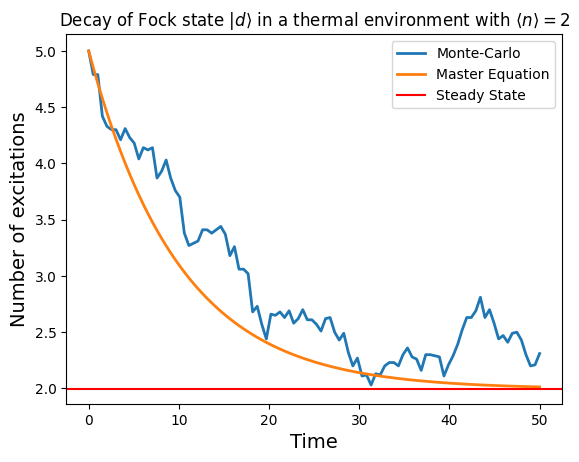

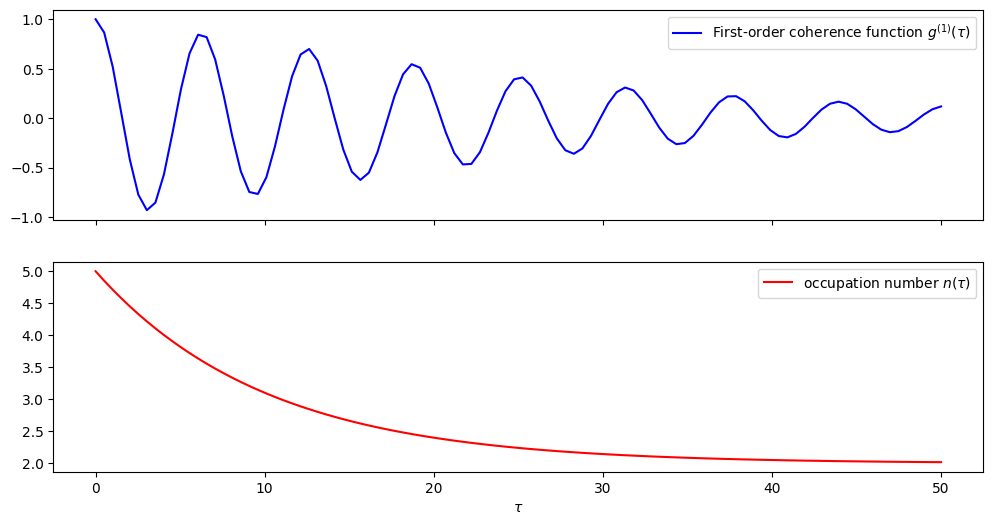

In [22]:
harm_osc_bath(np.linspace(0, 50, 100), 20, 5, 0.1, 2)

/usr/local/lib/python3.12/dist-packages/qutip/solver/solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


10.0%. Run time:   0.21s. Est. time left: 00:00:00:01
20.0%. Run time:   0.47s. Est. time left: 00:00:00:01
30.0%. Run time:   0.77s. Est. time left: 00:00:00:01
40.0%. Run time:   1.07s. Est. time left: 00:00:00:01
50.0%. Run time:   1.34s. Est. time left: 00:00:00:01
60.0%. Run time:   1.60s. Est. time left: 00:00:00:01
70.0%. Run time:   1.88s. Est. time left: 00:00:00:00
80.0%. Run time:   2.15s. Est. time left: 00:00:00:00
90.0%. Run time:   2.44s. Est. time left: 00:00:00:00
100.0%. Run time:   2.70s. Est. time left: 00:00:00:00
Total run time:   2.72s


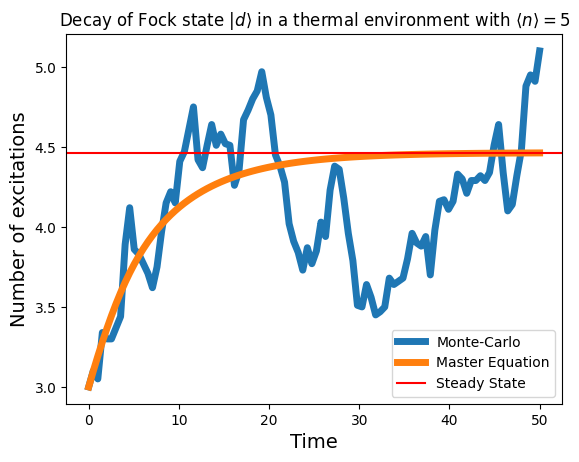

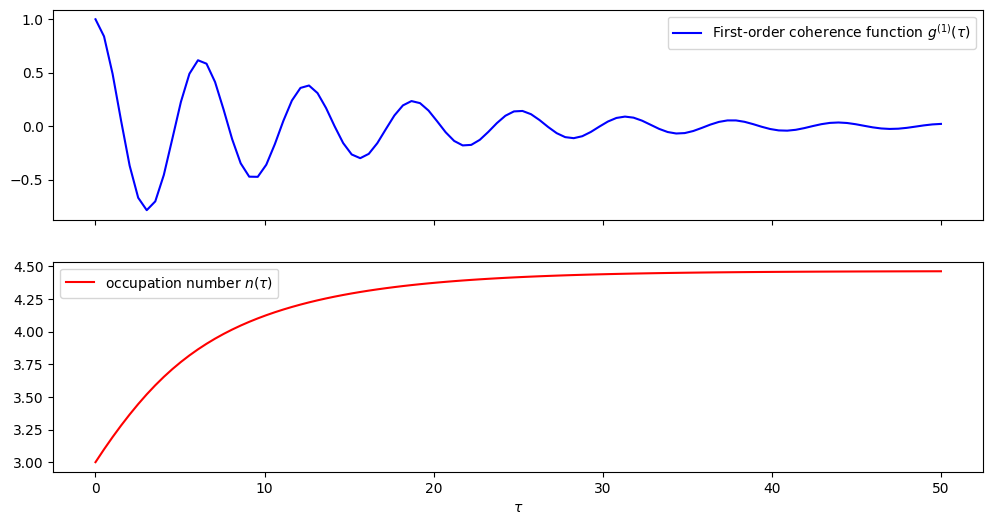

In [23]:
harm_osc_bath(np.linspace(0, 50, 100), 20, 3, 0.1, 5)